In [1]:
#!/usr/bin/env python3

import os
import sys
import numpy as np 
import argparse 
import time 

import torch 
import torch.nn as nn 
import torch.optim as optim 
import torch.nn.functional as F 


from torchvision import datasets, transforms

seed = 7
np.random.seed(seed)
dtype = torch.cuda.FloatTensor if torch.cuda.is_available() else torch.FloatTensor
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

batch_size =200

n_epochs = 5


def param(nnet, Mb=True):
    """
    Return the number of parameters in nnet
    """
    nelems = sum([param.nelement() for param in nnet.parameters()])

    return nelems / 10**6 if Mb else nelems

In [2]:
import os

import torch
import torchvision
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
from torchvision.utils import save_image
from torch.nn import functional as F

import numpy as np
import torch.optim as optim
import torch.utils.data
from torchvision import datasets, transforms
from collections import defaultdict


Num_H = 1600

class autoencoder(nn.Module):
    def __init__(self,Num_H):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, Num_H),
            nn.ReLU(True))
        self.decoder = nn.Sequential(
            nn.Linear(Num_H, 28*28), nn.ReLU(True))
        self.name = "DNN_autoencoder"

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [3]:
def test_ae(model, criterion, optimizer, test_loader):
    # monitor training loss
    test_loss = 0.0
    for data in test_loader:
        # _ stands in for labels, here
        images, _ = data
        # flatten images
        images = images.view(images.size(0), -1)
        images = images.to(device)
        outputs = model(images)
        loss = criterion(outputs, images)
        test_loss += loss.item()*images.size(0)

    test_loss = test_loss/len(test_loader)
    print('Val. Loss: {:.6f}'.format( 
        test_loss
        ))
    return test_loss

def train_ae(model, n_epochs, criterion, optimizer, train_loader, test_loader, w_name = "19_ann_ae"):
    for epoch in range(1, n_epochs+1):
        # monitor training loss
        train_loss = 0.0
        test_loss = 0.0
        ###################
        # train the model #
        ###################
        for data in train_loader:
            # _ stands in for labels, here
            images, _ = data
            # flatten images
            images = images.view(images.size(0), -1)
            images = images.to(device)
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            outputs = model(images)
            # calculate the loss
            loss = criterion(outputs, images)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update running training loss
            train_loss += loss.item()*images.size(0)

        # print avg training statistics 
        train_loss = train_loss/len(train_loader)
        test_loss = test_ae(model, criterion, optimizer, test_loader)
        print('Epoch: {} \t Training Loss: {:.6f} \t Val. Loss: {:.6f}'.format(
            epoch, 
            train_loss, test_loss
            ))

    torch.save(model.state_dict(), "model_weights/" + w_name + ".pt")
    return model, test_loss



In [4]:



### get data
# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# load the training and test datasets
train_data = datasets.MNIST(root='data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)
# Create training and test dataloaders

seed = 7
np.random.seed(seed)
dtype = torch.cuda.FloatTensor if torch.cuda.is_available() else torch.FloatTensor
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers)


lr = 0.0001
# specify loss function

# number of epochs to train the model
n_epochs = 10



In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_res(model):
    # obtain one batch of test images
    dataiter = iter(test_loader)
    images, labels = dataiter.next()

    images_flatten = images.view(images.size(0), -1)
    # get sample outputs
    output = model(images_flatten.to(device))
    # prep images for display
    images = images.numpy()

    # output is resized into a batch of images
    output = output.view(batch_size, 1, 28, 28)
    # use detach when it's an output that requires_grad
    output = output.cpu().detach().numpy()

    # plot the first ten input images and then reconstructed images
    fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(25,4))

    # input images on top row, reconstructions on bottom
    for images, row in zip([images, output], axes):
        for img, ax in zip(images, row):
            ax.imshow(np.squeeze(img), cmap='gray')
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
    plt.show()

In [77]:
# model_ae = autoencoder(800).cuda()
# criterion = nn.MSELoss()
# optimizer = torch.optim.Adam(
# model_ae.parameters(), lr=1e-4, weight_decay=1e-5)

# model_ae = train_ae(model_ae, 10, criterion, optimizer, train_loader)
# loss = train_ae(model_ae, criterion, optimizer, test_loader)

# print("DNN MSE Results, N = 800")
# print("DNN MSE", param(model_ae),"MB", ", Val. loss = ", loss)
# show_res(model_ae)

# ANN AE Results

Val. Loss: 0.768552
Epoch: 1 	 Training Loss: 1.000794 	 Val. Loss: 0.768552
Val. Loss: 0.659580
Epoch: 2 	 Training Loss: 0.695453 	 Val. Loss: 0.659580
Val. Loss: 0.605080
Epoch: 3 	 Training Loss: 0.621150 	 Val. Loss: 0.605080
Val. Loss: 0.558038
Epoch: 4 	 Training Loss: 0.574871 	 Val. Loss: 0.558038
Val. Loss: 0.506654
Epoch: 5 	 Training Loss: 0.519452 	 Val. Loss: 0.506654
Val. Loss: 0.485110
Epoch: 6 	 Training Loss: 0.492316 	 Val. Loss: 0.485110
Val. Loss: 0.471638
Epoch: 7 	 Training Loss: 0.475523 	 Val. Loss: 0.471638
Val. Loss: 0.460892
Epoch: 8 	 Training Loss: 0.464472 	 Val. Loss: 0.460892
Val. Loss: 0.451241
Epoch: 9 	 Training Loss: 0.452878 	 Val. Loss: 0.451241
Val. Loss: 0.446232
Epoch: 10 	 Training Loss: 0.445881 	 Val. Loss: 0.446232
DNN MAE Results, N = 800
DNN MAE 1.255984 MB , Val. loss =  0.44623172949999573


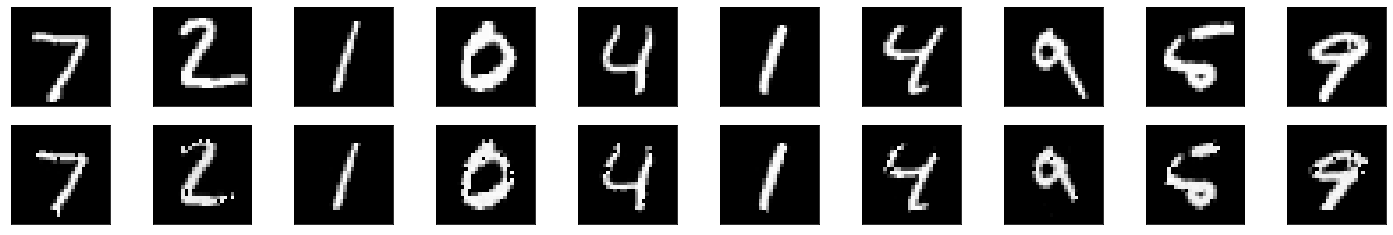

In [80]:
Num_H = 800

model_ae = autoencoder(Num_H).cuda()
criterion = nn.L1Loss()
optimizer = torch.optim.Adam(
model_ae.parameters(), lr=1e-4)

model_ae, loss = train_ae(model_ae, 10, criterion, optimizer, train_loader, test_loader, w_name = "ann_ae"+str(Num_H) )

print("DNN MAE Results, N = 800")
print("DNN MAE", param(model_ae),"MB", ", Val. loss = ", loss)
show_res(model_ae)

In [7]:
val_loss_book = []
para_book = []

Val. Loss: 1.065280
Epoch: 1 	 Training Loss: 1.462326 	 Val. Loss: 1.065280
Val. Loss: 0.922406
Epoch: 2 	 Training Loss: 0.982435 	 Val. Loss: 0.922406
Val. Loss: 0.861649
Epoch: 3 	 Training Loss: 0.891117 	 Val. Loss: 0.861649
Val. Loss: 0.822713
Epoch: 4 	 Training Loss: 0.842377 	 Val. Loss: 0.822713
Val. Loss: 0.792820
Epoch: 5 	 Training Loss: 0.807631 	 Val. Loss: 0.792820
Val. Loss: 0.773669
Epoch: 6 	 Training Loss: 0.783532 	 Val. Loss: 0.773669
Val. Loss: 0.757869
Epoch: 7 	 Training Loss: 0.766320 	 Val. Loss: 0.757869
Val. Loss: 0.746835
Epoch: 8 	 Training Loss: 0.752706 	 Val. Loss: 0.746835
Val. Loss: 0.738785
Epoch: 9 	 Training Loss: 0.743422 	 Val. Loss: 0.738785
Val. Loss: 0.733177
Epoch: 10 	 Training Loss: 0.736455 	 Val. Loss: 0.733177
DNN MAE Results, N = 100
--- DNN MAE 0.157684 MB , Val. loss =  0.7331770592927933


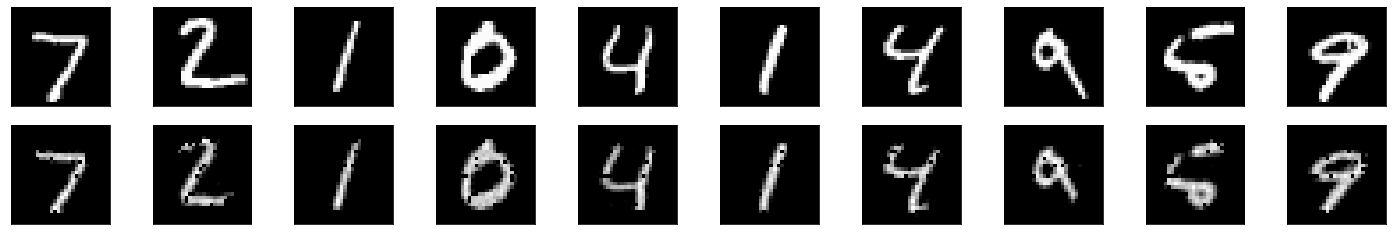

Val. Loss: 0.936779
Epoch: 1 	 Training Loss: 1.257681 	 Val. Loss: 0.936779
Val. Loss: 0.806474
Epoch: 2 	 Training Loss: 0.856757 	 Val. Loss: 0.806474
Val. Loss: 0.751983
Epoch: 3 	 Training Loss: 0.769847 	 Val. Loss: 0.751983
Val. Loss: 0.716331
Epoch: 4 	 Training Loss: 0.725412 	 Val. Loss: 0.716331
Val. Loss: 0.691719
Epoch: 5 	 Training Loss: 0.694759 	 Val. Loss: 0.691719
Val. Loss: 0.671003
Epoch: 6 	 Training Loss: 0.672034 	 Val. Loss: 0.671003
Val. Loss: 0.655631
Epoch: 7 	 Training Loss: 0.654204 	 Val. Loss: 0.655631
Val. Loss: 0.642486
Epoch: 8 	 Training Loss: 0.639743 	 Val. Loss: 0.642486
Val. Loss: 0.631325
Epoch: 9 	 Training Loss: 0.627865 	 Val. Loss: 0.631325
Val. Loss: 0.623076
Epoch: 10 	 Training Loss: 0.617936 	 Val. Loss: 0.623076
DNN MAE Results, N = 200
--- DNN MAE 0.314584 MB , Val. loss =  0.6230756052583456


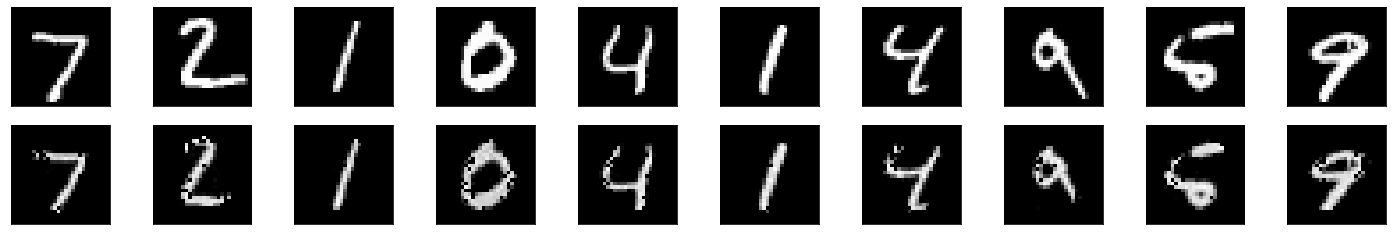

Val. Loss: 0.923471
Epoch: 1 	 Training Loss: 1.208695 	 Val. Loss: 0.923471
Val. Loss: 0.820414
Epoch: 2 	 Training Loss: 0.856198 	 Val. Loss: 0.820414
Val. Loss: 0.761033
Epoch: 3 	 Training Loss: 0.778750 	 Val. Loss: 0.761033
Val. Loss: 0.722568
Epoch: 4 	 Training Loss: 0.729398 	 Val. Loss: 0.722568
Val. Loss: 0.691910
Epoch: 5 	 Training Loss: 0.696459 	 Val. Loss: 0.691910
Val. Loss: 0.669438
Epoch: 6 	 Training Loss: 0.670943 	 Val. Loss: 0.669438
Val. Loss: 0.652001
Epoch: 7 	 Training Loss: 0.649978 	 Val. Loss: 0.652001
Val. Loss: 0.632150
Epoch: 8 	 Training Loss: 0.632010 	 Val. Loss: 0.632150
Val. Loss: 0.618404
Epoch: 9 	 Training Loss: 0.616382 	 Val. Loss: 0.618404
Val. Loss: 0.604165
Epoch: 10 	 Training Loss: 0.602780 	 Val. Loss: 0.604165
DNN MAE Results, N = 300
--- DNN MAE 0.471484 MB , Val. loss =  0.6041649101674557


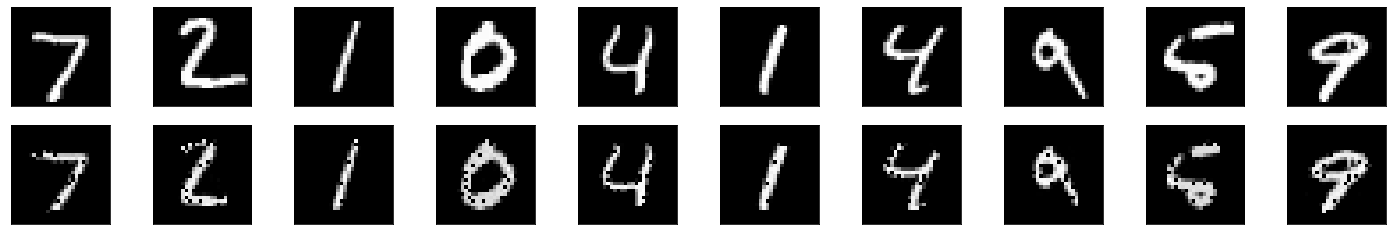

Val. Loss: 0.858525
Epoch: 1 	 Training Loss: 1.121954 	 Val. Loss: 0.858525
Val. Loss: 0.759121
Epoch: 2 	 Training Loss: 0.788401 	 Val. Loss: 0.759121
Val. Loss: 0.704482
Epoch: 3 	 Training Loss: 0.715344 	 Val. Loss: 0.704482
Val. Loss: 0.664277
Epoch: 4 	 Training Loss: 0.670498 	 Val. Loss: 0.664277
Val. Loss: 0.634295
Epoch: 5 	 Training Loss: 0.637333 	 Val. Loss: 0.634295
Val. Loss: 0.610762
Epoch: 6 	 Training Loss: 0.610993 	 Val. Loss: 0.610762
Val. Loss: 0.588046
Epoch: 7 	 Training Loss: 0.589292 	 Val. Loss: 0.588046
Val. Loss: 0.569965
Epoch: 8 	 Training Loss: 0.571146 	 Val. Loss: 0.569965
Val. Loss: 0.556269
Epoch: 9 	 Training Loss: 0.556333 	 Val. Loss: 0.556269
Val. Loss: 0.546024
Epoch: 10 	 Training Loss: 0.544815 	 Val. Loss: 0.546024
DNN MAE Results, N = 400
--- DNN MAE 0.628384 MB , Val. loss =  0.546024288572371


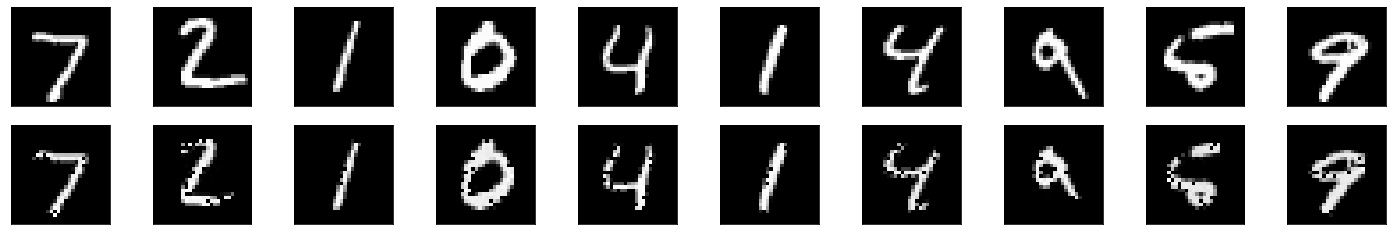

Val. Loss: 0.844092
Epoch: 1 	 Training Loss: 1.086207 	 Val. Loss: 0.844092
Val. Loss: 0.747796
Epoch: 2 	 Training Loss: 0.776767 	 Val. Loss: 0.747796
Val. Loss: 0.690134
Epoch: 3 	 Training Loss: 0.705058 	 Val. Loss: 0.690134
Val. Loss: 0.653234
Epoch: 4 	 Training Loss: 0.659905 	 Val. Loss: 0.653234
Val. Loss: 0.620543
Epoch: 5 	 Training Loss: 0.625781 	 Val. Loss: 0.620543
Val. Loss: 0.594617
Epoch: 6 	 Training Loss: 0.599890 	 Val. Loss: 0.594617
Val. Loss: 0.575131
Epoch: 7 	 Training Loss: 0.579377 	 Val. Loss: 0.575131
Val. Loss: 0.562231
Epoch: 8 	 Training Loss: 0.563683 	 Val. Loss: 0.562231
Val. Loss: 0.552718
Epoch: 9 	 Training Loss: 0.552207 	 Val. Loss: 0.552718
Val. Loss: 0.546809
Epoch: 10 	 Training Loss: 0.544943 	 Val. Loss: 0.546809
DNN MAE Results, N = 500
--- DNN MAE 0.785284 MB , Val. loss =  0.5468090297281742


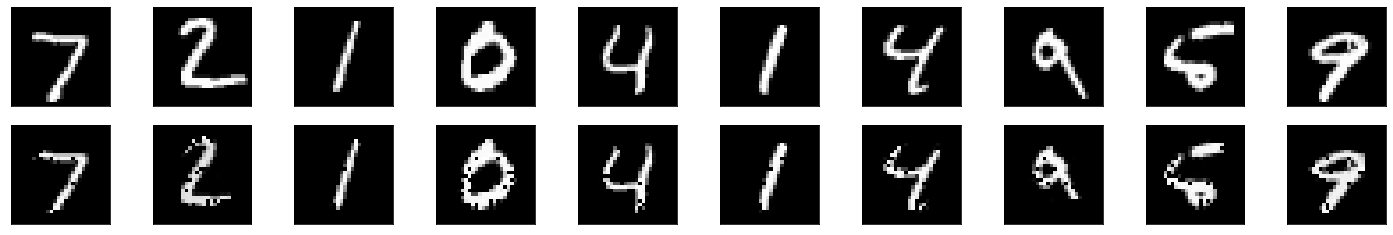

Val. Loss: 0.783831
Epoch: 1 	 Training Loss: 1.016310 	 Val. Loss: 0.783831
Val. Loss: 0.679430
Epoch: 2 	 Training Loss: 0.709374 	 Val. Loss: 0.679430
Val. Loss: 0.626623
Epoch: 3 	 Training Loss: 0.636857 	 Val. Loss: 0.626623
Val. Loss: 0.582679
Epoch: 4 	 Training Loss: 0.590284 	 Val. Loss: 0.582679
Val. Loss: 0.550240
Epoch: 5 	 Training Loss: 0.555399 	 Val. Loss: 0.550240
Val. Loss: 0.523235
Epoch: 6 	 Training Loss: 0.527915 	 Val. Loss: 0.523235
Val. Loss: 0.509276
Epoch: 7 	 Training Loss: 0.508425 	 Val. Loss: 0.509276
Val. Loss: 0.497389
Epoch: 8 	 Training Loss: 0.495066 	 Val. Loss: 0.497389
Val. Loss: 0.489543
Epoch: 9 	 Training Loss: 0.487041 	 Val. Loss: 0.489543
Val. Loss: 0.486115
Epoch: 10 	 Training Loss: 0.482541 	 Val. Loss: 0.486115
DNN MAE Results, N = 600
--- DNN MAE 0.942184 MB , Val. loss =  0.4861150772869587


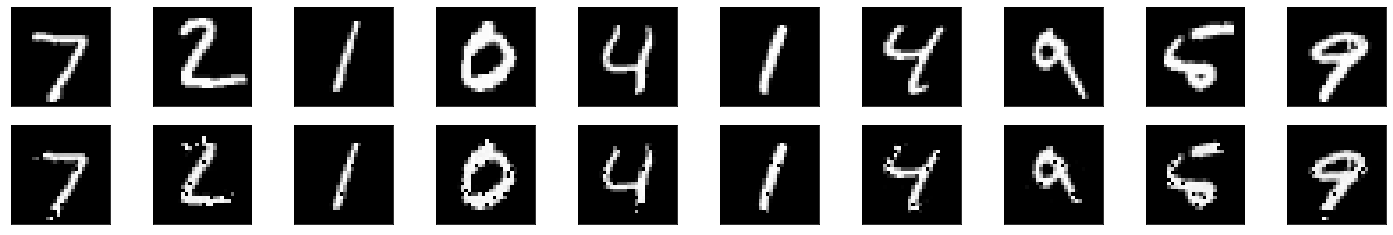

Val. Loss: 0.826120
Epoch: 1 	 Training Loss: 1.045936 	 Val. Loss: 0.826120
Val. Loss: 0.731059
Epoch: 2 	 Training Loss: 0.760926 	 Val. Loss: 0.731059
Val. Loss: 0.676872
Epoch: 3 	 Training Loss: 0.692159 	 Val. Loss: 0.676872
Val. Loss: 0.637880
Epoch: 4 	 Training Loss: 0.648221 	 Val. Loss: 0.637880
Val. Loss: 0.608415
Epoch: 5 	 Training Loss: 0.616662 	 Val. Loss: 0.608415
Val. Loss: 0.587687
Epoch: 6 	 Training Loss: 0.593917 	 Val. Loss: 0.587687
Val. Loss: 0.574445
Epoch: 7 	 Training Loss: 0.578719 	 Val. Loss: 0.574445
Val. Loss: 0.570736
Epoch: 8 	 Training Loss: 0.569986 	 Val. Loss: 0.570736
Val. Loss: 0.568105
Epoch: 9 	 Training Loss: 0.565688 	 Val. Loss: 0.568105
Val. Loss: 0.565708
Epoch: 10 	 Training Loss: 0.563603 	 Val. Loss: 0.565708
DNN MAE Results, N = 700
--- DNN MAE 1.099084 MB , Val. loss =  0.5657077160477638


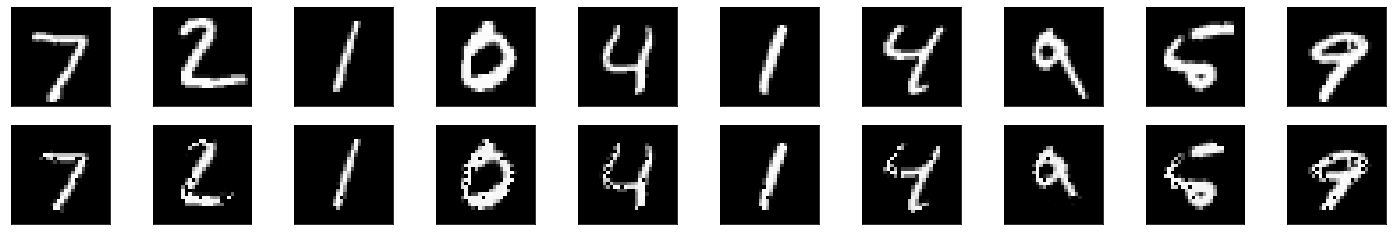

Val. Loss: 0.746224
Epoch: 1 	 Training Loss: 0.961341 	 Val. Loss: 0.746224
Val. Loss: 0.645171
Epoch: 2 	 Training Loss: 0.675710 	 Val. Loss: 0.645171
Val. Loss: 0.591725
Epoch: 3 	 Training Loss: 0.604687 	 Val. Loss: 0.591725
Val. Loss: 0.551967
Epoch: 4 	 Training Loss: 0.559696 	 Val. Loss: 0.551967
Val. Loss: 0.520932
Epoch: 5 	 Training Loss: 0.528048 	 Val. Loss: 0.520932
Val. Loss: 0.502254
Epoch: 6 	 Training Loss: 0.506059 	 Val. Loss: 0.502254
Val. Loss: 0.492358
Epoch: 7 	 Training Loss: 0.492518 	 Val. Loss: 0.492358
Val. Loss: 0.488076
Epoch: 8 	 Training Loss: 0.485356 	 Val. Loss: 0.488076
Val. Loss: 0.486385
Epoch: 9 	 Training Loss: 0.482041 	 Val. Loss: 0.486385
Val. Loss: 0.483837
Epoch: 10 	 Training Loss: 0.480386 	 Val. Loss: 0.483837
DNN MAE Results, N = 800
--- DNN MAE 1.255984 MB , Val. loss =  0.4838373628631234


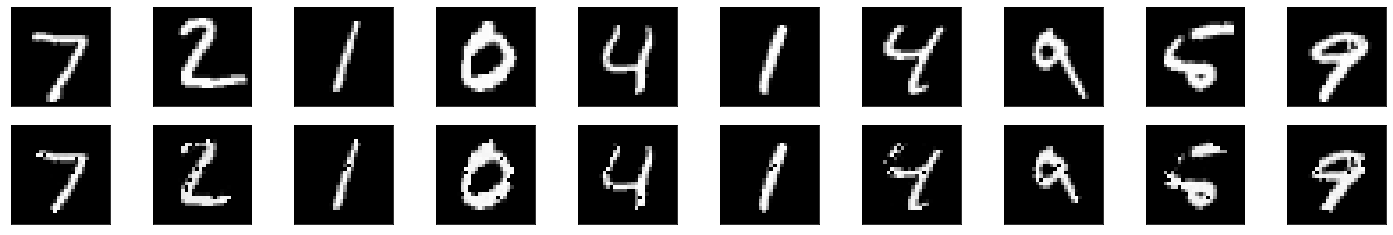

In [8]:
for Num_H in [100, 200, 300, 400, 500, 600,700,800]:

    model_ae = autoencoder(Num_H).cuda()
    criterion = nn.L1Loss()
    optimizer = torch.optim.Adam(
    model_ae.parameters(), lr=1e-4)

    model_ae , val_loss = train_ae(model_ae, 10, criterion, optimizer, train_loader, test_loader, w_name = "ann_ae"+str(Num_H) )
    val_loss_book.append(val_loss)

    print("DNN MAE Results, N =", Num_H)
    print("--- DNN MAE", param(model_ae),"MB", ", Val. loss = ", val_loss)
    para_book.append(param(model_ae))
    show_res(model_ae)